#Task 1

Do the following
- Import California Housing dataset
- Split the sample into train : test with a ratio of 70:30 and keeping `random_state=42`

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X,y = fetch_california_housing(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)




#Task 2
- Import Linear Regression Model
- Fit the data split earlier to the model
- Test and calculate the score

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score2= model.score(X_train, y_train)
print(score)
print(score2)


0.595770232606166
0.609345972797216


#Task 3

- Import diabetes dataset
- Split the sample into train : test with a ratio of 60:40
- Keep `random_state = 42`


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

#Task 4
- Import Linear Regression Model with intercept
- Fit the data split earlier to the model
- Test and calculate the score with intercept

In [ ]:
from sklearn.linear_model import LinearRegression

model_with_intercept = LinearRegression(fit_intercept= True)
model_with_intercept.fit(X_train, y_train)
score_with_intercept = model_with_intercept.score(X_test, y_test)
print(f'Model score with intercept  - {score_with_intercept}')



Model score with intercept  - 0.5157444756897698


#Task 5
- Import Linear Regression Model without intercept
- Fit the data split earlier to the model
- Test and calculate the score without intercept

In [ ]:
from sklearn.linear_model import LinearRegression
model_without_intercept = LinearRegression(fit_intercept= False)
model_without_intercept.fit(X_train, y_train)
score_without_intercept = model_without_intercept.score(X_test, y_test)
print(f'Model score without intercept - {score_without_intercept}')

Model score without intercept - -3.7861093338014173


Intercept when fit_intercept=True : 99.44929
Intercept when fit_intercept=False : 0.00000


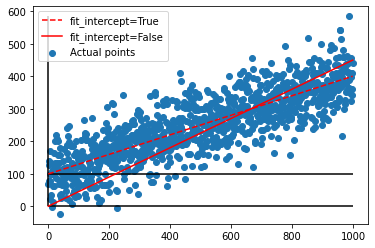

In [ ]:
#What happens when we put fit_intercept= False or True.
#Let us see an example
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

bias = 100

X = np.arange(1000).reshape(-1,1)
y_true = np.ravel(X.dot(0.3) + bias)
noise = np.random.normal(0, 60, 1000)
y = y_true + noise

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)

lr_fi_true.fit(X, y)
lr_fi_false.fit(X, y)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

lr_fi_true_yhat = np.dot(X, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(X, lr_fi_false.coef_) + lr_fi_false.intercept_

plt.scatter(X, y, label='Actual points')
plt.plot(X, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(X, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y.max())
plt.hlines(bias, X.min(), X.max())
plt.hlines(0, X.min(), X.max())

plt.show()

#Task 6

- Print value of intercept of the model trained on diabetes data
- Print the value of the coefficients (Note this will print an array with 10 values which is the same as shape of X)

In [ ]:
print(model_with_intercept.intercept_)
print(model_with_intercept.coef_)
print(model_without_intercept.intercept_)
print(model_without_intercept.coef_)

148.92850899668235
[  18.08383103 -227.04654841  592.2754776   361.54657801 -655.89624143
  353.71022539   14.40233952  142.86622578  594.01401521   31.67348554]
0.0
[  21.4116396  -251.46942516  805.83148774  287.96985345 -356.12098013
   19.57062432  115.66733098  210.7775154   508.31873399  141.85938945]


#Task 7
- Load diabetes dataset
- Split the dataset with test_size = 0.4
- Train with SGDRegressor and calculate score

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

X,y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

model = SGDRegressor()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))



0.40554891186668873


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


#Task 8
- Scale above dataset with Standard Scaler
- Train with SGDRegressor and calculate score

In [ ]:



scaler = StandardScaler()
X_train_norm =scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

model = SGDRegressor()
model.fit(X_train_norm,y_train)

print(model.score(X_test_norm, y_test))

0.5069019647112674


##Task 9
- Train above scaled dataset with SGDRegressor, keep number of iterations as 10000 and calculate score

In [ ]:

model = SGDRegressor(max_iter = 10000)
model.fit(X_train_norm,y_train)

print(model.score(X_test_norm, y_test))

0.5076852136397965


##Task 10
- Train above scaled dataset with SGDRegressor, penalty as l1 norm and calculate score

In [ ]:
model = SGDRegressor(penalty = 'l1')
model.fit(X_train_norm,y_train)

print(model.score(X_test_norm, y_test))

0.5085558103986771


##Task 11
- Train above scaled dataset with SGDRegressor, learning rate as adaptive and calculate score

In [ ]:
model = SGDRegressor(learning_rate = 'adaptive')
#‘adaptive’: eta = eta0, as long as the training keeps decreasing.
#Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol
#or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
model.fit(X_train_norm,y_train)
print(model.score(X_test_norm, y_test))

0.5119492893646735


#Task 12 :

 - Import Ridge Regression model, train on above scaled datset and calculate score

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train_norm,y_train)

print(model.score(X_test_norm,y_test))

0.514187198173337


#Task 13

 - Import Lasso Regression model, train on above scaled datset and calculate score

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_norm,y_train)

print(model.score(X_test_norm,y_test))

0.508459571308439


#Task 14

- Import Pipeline
- Import Polynomial features with degree 5
- Fit LinearRegression and recover coefficients on below polynomial data

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([('poly', PolynomialFeatures(degree = 5)),
                  ('linear', LinearRegression(fit_intercept=False))])

# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - (4 * x) + (5*(x**2))-(6*(x**3))+(7*(x**4))-(8*(x**5))

model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3.        , -0.54338937, -2.20127215, -0.9591095 ,  5.55974557,
       -7.85597456])

#Task 15

- Import RidgeCV
- Import California Housing Dataset
- use regularization rates of 0.002, 0.02,0.5, 0.2 and 1
- calculate and print score
- print best regularization parameter

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import RidgeCV

X,y = fetch_california_housing(return_X_y = True)
model = RidgeCV(alphas = [0.002, 0.02,0.5, 0.2,1]).fit(X,y)
print(model.score(X,y))
print(model.alpha_)

0.6062326586793623
1.0


#Task 16

- Import LassoCV
- Import California Housing Dataset
- use regularization rates of 0.002, 0.02,0.5, 0.2 and 1
- calculate and print score
- print best regularization parameter

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV

X,y = fetch_california_housing(return_X_y = True)
model = LassoCV(alphas = [0.002, 0.02,0.5, 0.2,1]).fit(X,y)
print(model.score(X,y))
print(model.alpha_)

0.6060801136504586
0.002


#Task 16

- Import LassoLars
- use regularization rates of 0.1 and normalize = True
- calculate and print score
- print best regularization parameter

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LassoLars
reg = linear_model.LassoLars(alpha=0.01, normalize=True)
reg.fit([[-2, 1], [0, 1], [1, 0]], [-2, 0, -1])
LassoLars(alpha=0.1, normalize=False)
print(reg.coef_)
print(reg.alphas_)
print(reg.active_)
print (reg.coef_path_)

[0.9431014  1.84946045]
[0.3086067  0.13285545 0.01      ]
[0, 1]
[[0.         0.52725374 2.03733187]
 [0.         0.         1.51007814]]


#Task 17
- Import mean_squared_error
- Calculate MSE on below data


```
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
```



In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [1, 0.5, 2.5, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.9375

#Task 18
- Import explained_variance_score
- Calculate score on below data


```
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
```



In [ ]:
from sklearn.metrics import explained_variance_score
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)

0.10999999999999999

#Task 19
- Import explained_variance_score
- Calculate score on below multioutput data


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import explained_variance_score
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='raw_values')

array([0.96130952, 0.85714286])

#Task 20
- Import explained_variance_score
- Calculate score on below multioutput data with weightage of [0.2,0.8]


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import explained_variance_score
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput=[0.2,0.8])

0.8779761904761905

#Task 21
- Import max_error
- Calculate score on below data


```
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
```



In [ ]:
from sklearn.metrics import max_error
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
max_error(y_true, y_pred)

3.0

#Task 22
- Import mean_absolute_error
- Calculate score on below data


```
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
```



In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

2.375

#Task 23
- Import mean_absolute_error
- Calculate score on below multioutput  data with uniform averages


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_absolute_error(y_true, y_pred)

0.9166666666666667

#Task 24
- Import mean_absolute_error
- Calculate score on below multioutput  data with raw_values


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_absolute_error(y_true, y_pred, multioutput = 'raw_values')

array([0.83333333, 1.        ])

#Task 25
- Import mean_absolute_error
- Calculate score on below multioutput  data with weightage of  [0.2, 0.8]


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_absolute_error(y_true, y_pred, multioutput = [0.2, 0.8])

0.9666666666666668

#Task 26
- Import mean_squared_error
- Calculate score on below multioutput  data with raw_values


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_squared_error(y_true, y_pred, multioutput = 'raw_values')


array([0.75, 1.  ])

#Task 27
- Import mean_squared_error
- Calculate score on below multioutput  data with weightage of [0.2,0.8]


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_squared_error(y_true, y_pred, multioutput = [0.2,0.8])

0.9500000000000001

#Task 28
- Import mean_squared_error
- Calculate Root Mean Squared Error score on below multioutput  data with raw_values


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_squared_error(y_true, y_pred, squared = False, multioutput = 'raw_values')

array([0.8660254, 1.       ])

#Task 29
- Import mean_squared_error
- Calculate Root Mean Squared Error score on below multioutput data with weightage = [0.2, 0.8]


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
mean_squared_error(y_true, y_pred, multioutput = [0.2,0.8], squared = False)

0.9732050807568877

#Task 30
- Import r2_score
- Calculate score on below data


```
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
```



In [ ]:
from sklearn.metrics import r2_score
y_true = [1, 2, -1, 5]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

-0.2933333333333332

#Task 31
- Import mean_absolute_error
- Calculate score on below multioutput  data with uniform average



```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import r2_score

y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
r2_score(y_true, y_pred, multioutput='uniform_average')

0.8995535714285714

#Task
- Import mean_absolute_error
- Calculate score on below multioutput  data with variance_weighted



```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import r2_score

y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')

0.9296875

#Task
- Import r2_score
- Calculate score on below multioutput  data with raw_values


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```



In [ ]:
from sklearn.metrics import r2_score

y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
r2_score(y_true, y_pred, multioutput='raw_values')

array([0.95982143, 0.83928571])

#Task
- Import mean_squared_error
- Calculate Root Mean Squared Error score on below multioutput data with weightage = [0.2, 0.8]


```
y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
```

In [ ]:
from sklearn.metrics import r2_score

y_true = [[1, 2], [-1, 0], [9, -4]]
y_pred = [[2, 1], [-1.5, 1], [8, -5]]
r2_score(y_true, y_pred, multioutput=[0.2, 0.8])

0.8633928571428572

#Task

 - import DummyRegressor
 - use strategy as median and calculate score on following data


```
X = np.array([2.0, 4.0, 3.0, 5.0])
y = np.array([1.0, -2.0, -4.0, -8.0])
```



In [ ]:
import numpy as np
from sklearn.dummy import DummyRegressor

X = np.array([2.0, 4.0, 3.0, 5.0])
y = np.array([1.0, -2.0, -4.0, -8.0])

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(X, y)
z=dummy_regr.predict(X)
print(z)
print(y)
dummy_regr.score(X, y)

[-3. -3. -3. -3.]
[ 1. -2. -4. -8.]


-0.005847953216374213

#Task

- Import KFold from sklearn
- Split the following data into 3 folds


```
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
y = np.array([1, 2, 3, 4,5,6])
```



In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
y = np.array([1, 2, 3, 4,5,6])
kf = KFold(n_splits=3)

for train,test in kf.split(X):
  X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
  print ('X_train: %s'% X_train)
  print ('y_train: %s'% y_train)
  print ('X_test: %s'% X_test)
  print ('y_test: %s'% y_test)



X_train: [[1 2]
 [3 4]
 [2 4]
 [3 2]]
y_train: [3 4 5 6]
X_test: [[1 2]
 [3 4]]
y_test: [1 2]
X_train: [[1 2]
 [3 4]
 [2 4]
 [3 2]]
y_train: [1 2 5 6]
X_test: [[1 2]
 [3 4]]
y_test: [3 4]
X_train: [[1 2]
 [3 4]
 [1 2]
 [3 4]]
y_train: [1 2 3 4]
X_test: [[2 4]
 [3 2]]
y_test: [5 6]


#Task

Use RepeatedKFold on the following data with 3 splits and 3 repeats


```
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
y = np.array([1, 2, 3, 4,5,6])
```



In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
y = np.array([1, 2, 3, 4,5,6])
rkf = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)
for train,test in rkf.split(X):
  X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
  print ('X_train: %s'% X_train)
  print ('y_train: %s'% y_train)
  print ('X_test: %s'% X_test)
  print ('y_test: %s'% y_test)

X_train: [[1 2]
 [3 4]
 [2 4]
 [3 2]]
y_train: [3 4 5 6]
X_test: [[1 2]
 [3 4]]
y_test: [1 2]
X_train: [[1 2]
 [3 4]
 [3 4]
 [2 4]]
y_train: [1 2 4 5]
X_test: [[1 2]
 [3 2]]
y_test: [3 6]
X_train: [[1 2]
 [3 4]
 [1 2]
 [3 2]]
y_train: [1 2 3 6]
X_test: [[3 4]
 [2 4]]
y_test: [4 5]
X_train: [[3 4]
 [1 2]
 [2 4]
 [3 2]]
y_train: [2 3 5 6]
X_test: [[1 2]
 [3 4]]
y_test: [1 4]
X_train: [[1 2]
 [3 4]
 [2 4]
 [3 2]]
y_train: [1 4 5 6]
X_test: [[3 4]
 [1 2]]
y_test: [2 3]
X_train: [[1 2]
 [3 4]
 [1 2]
 [3 4]]
y_train: [1 2 3 4]
X_test: [[2 4]
 [3 2]]
y_test: [5 6]
X_train: [[1 2]
 [1 2]
 [3 4]
 [3 2]]
y_train: [1 3 4 6]
X_test: [[3 4]
 [2 4]]
y_test: [2 5]
X_train: [[3 4]
 [1 2]
 [2 4]
 [3 2]]
y_train: [2 3 5 6]
X_test: [[1 2]
 [3 4]]
y_test: [1 4]
X_train: [[1 2]
 [3 4]
 [3 4]
 [2 4]]
y_train: [1 2 4 5]
X_test: [[1 2]
 [3 2]]
y_test: [3 6]


#Task

Use LeaveOneOut on the following data and create the splits


```
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])

```


In [ ]:
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
loo = LeaveOneOut()

split = 1
for train, test in loo.split(X):
    print("split# %d, %s %s" % (split, train, test))
    split += 1

split# 1, [1 2 3 4 5] [0]
split# 2, [0 2 3 4 5] [1]
split# 3, [0 1 3 4 5] [2]
split# 4, [0 1 2 4 5] [3]
split# 5, [0 1 2 3 5] [4]
split# 6, [0 1 2 3 4] [5]


#Task

Use LeavePOut on the following data and create the splits. Use p as 3


```
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])

```


In [ ]:
from sklearn.model_selection import LeavePOut

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
lpo = LeavePOut(p = 3)

split = 1
for train, test in lpo.split(X):
    print("split# %d, %s %s" % (split, train, test))
    split += 1

split# 1, [3 4 5] [0 1 2]
split# 2, [2 4 5] [0 1 3]
split# 3, [2 3 5] [0 1 4]
split# 4, [2 3 4] [0 1 5]
split# 5, [1 4 5] [0 2 3]
split# 6, [1 3 5] [0 2 4]
split# 7, [1 3 4] [0 2 5]
split# 8, [1 2 5] [0 3 4]
split# 9, [1 2 4] [0 3 5]
split# 10, [1 2 3] [0 4 5]
split# 11, [0 4 5] [1 2 3]
split# 12, [0 3 5] [1 2 4]
split# 13, [0 3 4] [1 2 5]
split# 14, [0 2 5] [1 3 4]
split# 15, [0 2 4] [1 3 5]
split# 16, [0 2 3] [1 4 5]
split# 17, [0 1 5] [2 3 4]
split# 18, [0 1 4] [2 3 5]
split# 19, [0 1 3] [2 4 5]
split# 20, [0 1 2] [3 4 5]


#Task

- Use ShuffleSplit and split the following data. Keep test size as 0.33


```
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])

```



In [ ]:
from sklearn.model_selection import ShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,4],[3,2]])
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)

split = 1
for train_index, test_index in ss.split(X):
    print("split #%d, %s %s" % (split, train_index, test_index))
    split += 1

split #1, [5 2 4 3] [0 1]
split #2, [1 2 5 4] [3 0]
split #3, [0 3 5 2] [4 1]
split #4, [3 1 4 2] [0 5]
split #5, [4 0 3 1] [2 5]


#Task

- Import Ridge model
- Import California Housing model
- Import cross_val_score
- calculate score using cv = 4, and print score

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X, y = fetch_california_housing(return_X_y = True)
model = Ridge()
score = cross_val_score(model, X, y, cv=4)

print(score)

[0.50821118 0.53912285 0.5758899  0.59909015]
